In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df = pd.get_dummies(insurance)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [14]:
df['bmi'].head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

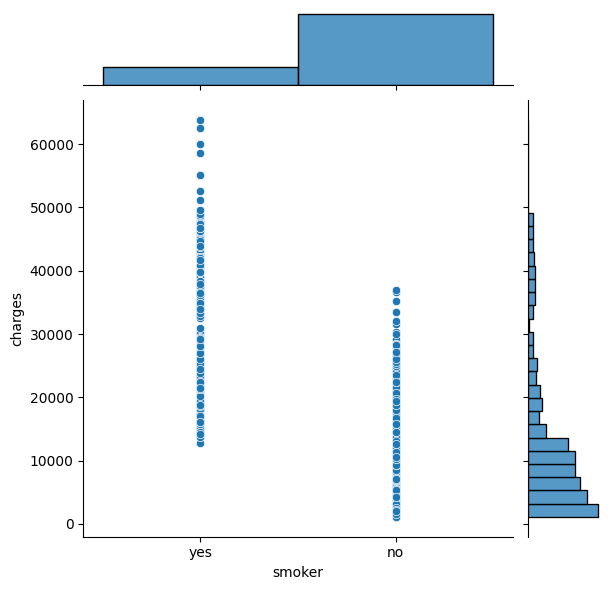

In [23]:
sns.jointplot(x= insurance['smoker'], y= insurance['charges'])

<Axes: xlabel='smoker', ylabel='region'>

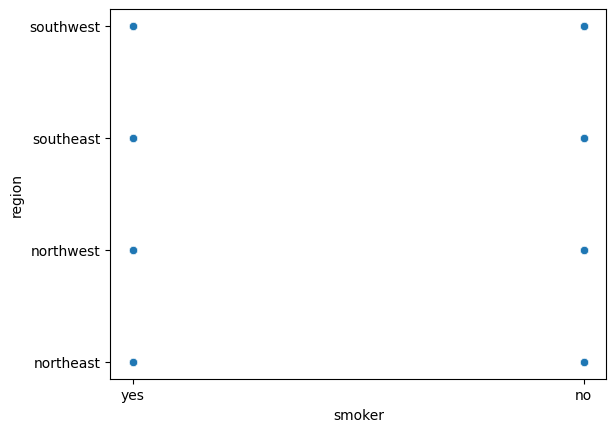

In [24]:
sns.scatterplot(x = insurance['smoker'], y= insurance['region'])

<Axes: xlabel='bmi', ylabel='sex'>

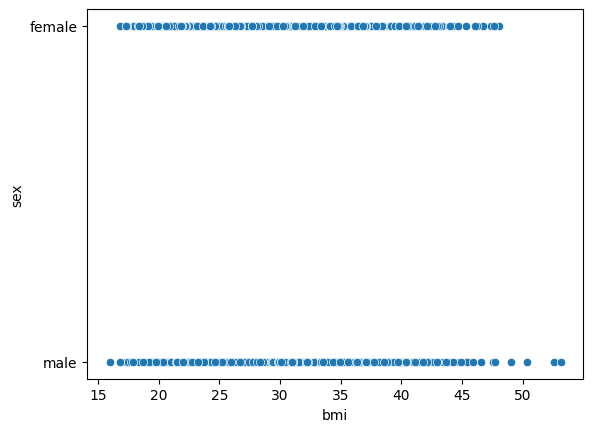

In [25]:
sns.scatterplot(x = insurance['bmi'], y = insurance['sex'])

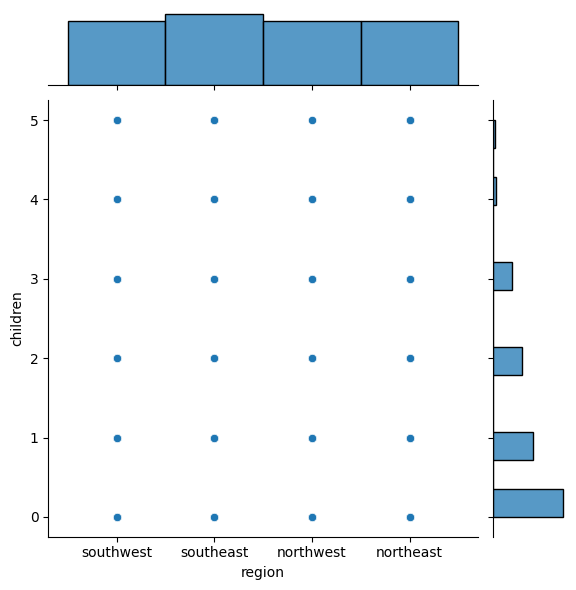

In [33]:
sns.jointplot(x = insurance['region'], y = insurance['children']) # southeast region has the most children

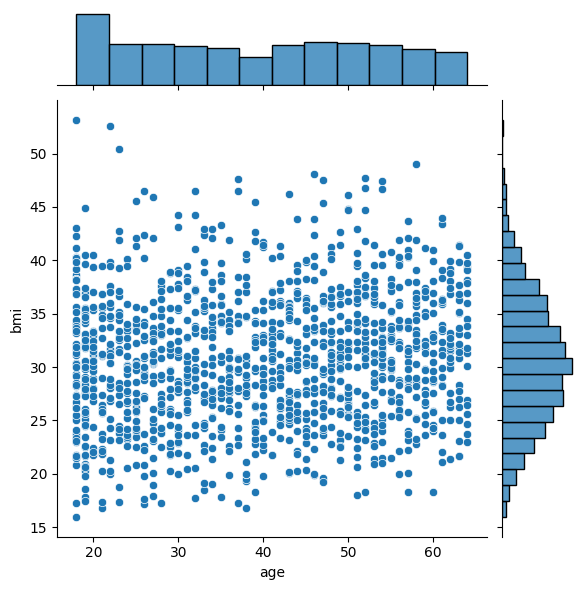

In [32]:
sns.jointplot(x = insurance['age'], y = insurance['bmi'])

<Axes: xlabel='bmi', ylabel='children'>

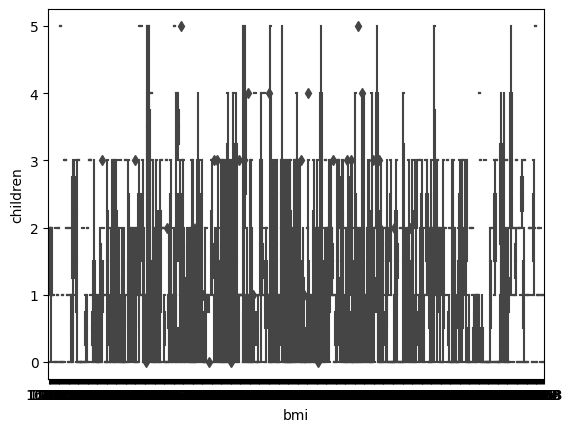

In [37]:
sns.boxplot(x = insurance['bmi'], y = insurance['children'], width = 1.5) # there is a some outlier in bmi variables.

<Axes: xlabel='bmi', ylabel='charges'>

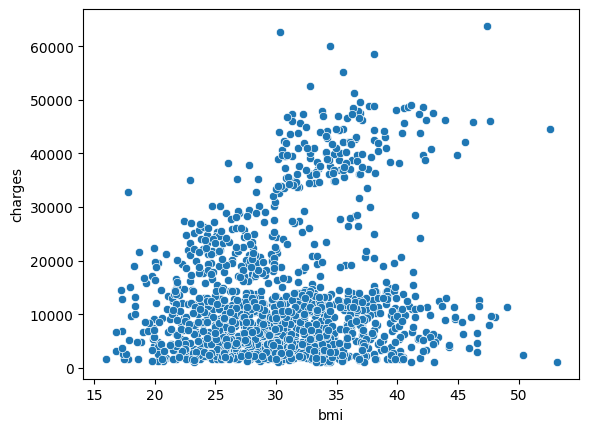

In [38]:
sns.scatterplot(x = insurance['bmi'], y = insurance['charges'])

In [47]:
y = df['charges']
x = df.drop(['charges'], axis = 1)

In [48]:
from sklearn.model_selection import train_test_split #training the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [56]:
from sklearn.preprocessing import StandardScaler
df.values[:] = StandardScaler().fit_transform(df) # it changed df to two dimensional array

In [76]:
from sklearn.ensemble import RandomForestRegressor
df_model = RandomForestRegressor().fit(x_train, y_train) #trained with linear regression

In [77]:
df_model_cv = RandomForestRegressor(random_state = 10)

In [78]:
df_params = {"n_estimators": [20,30,70,90,150],
           "max_depth": list(range(1,10)),
           "min_samples_split": np.arange(0.1,1,0.1)}

In [79]:
from sklearn.model_selection import GridSearchCV
df_new = GridSearchCV(df_model_cv,df_params, cv = 5)

In [80]:
df_new.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [20, 30, 70, 90, 150]})

In [81]:
df_new.best_params_ # calculating best parameters of dataset

{'max_depth': 7, 'min_samples_split': 0.1, 'n_estimators': 150}

In [83]:
df_final = RandomForestRegressor(max_depth=7 , min_samples_split=0.1 , n_estimators = 150).fit(x_train,y_train)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
final_prediction = df_final.predict(x_train)
mse = mean_squared_error(y_train, final_prediction) # mean squared error of y_train and predicted x_train
print(mse)

21571524.4644712


In [89]:
mae = mean_absolute_error(y_train, final_prediction)
print(mae)

2769.3037951426018


In [90]:
r2 = r2_score(y_train, final_prediction)
print(r2)

0.8486487696950605
